The Displaced Diffusion formula for a call and put option is given by

$$
C_{DD} = Black76Call\left(\frac{F_0}{\beta}, K + \frac{1-\beta}{\beta}F_0, \sigma\beta,T\right)\\
P_{DD} = Black76Put\left(\frac{F_0}{\beta}, K + \frac{1-\beta}{\beta}F_0, \sigma\beta,T\right)
$$

Where $$F_0 = S_0e^{rT}$$ 

Is the forward price of an underlying asset.

The formula can be implemented in Python as follows:

In [10]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm

def displaced_diffusion_call(S,K,r,sigma,T,beta):
    '''
    Returns price of a call option using the displaced diffusion method
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            call option price
    '''
    #params seem shared for call and put, possible to create
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 

    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * (F_b * norm.cdf(d1) - K_b * norm.cdf(d2))

def displaced_diffusion_put(S,K,r,sigma,T,beta):
    '''
    Returns price of a put option using the displaced diffusion method
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            put option price
    '''
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 
    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * (K_b * norm.cdf(-d2) - F_b * norm.cdf(-d1))


Additionally, we can also model the Displaced Diffusion formula for a digital cash or nothing (DCON) call and put option.

$$
C_{DD_{DCOA}} = e^{-rT}\Phi(d_2) \\
P_{DD_{DCOA}} = e^{-rT}\Phi(-d_2) \\

d_2 = \left(\frac{log\frac{\frac{F_{0}}{\beta}}{K+\frac{1-\beta}{\beta}F_0} - \frac{1}{2}{(\sigma\beta)}^2T}{(\sigma\beta)\sqrt{T}}\right)

$$

Where $$F_0 = S_0e^{rT}$$ 

Is the forward price of an underlying asset.

The formula can be implemented in Python as follows:

In [11]:
def displaced_diffusion_dcon_call(S,K,r,sigma,T,beta):
    '''
    Returns price of a call option using the displaced diffusion method (DCON)
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            call option price (DCON)
    '''
    #params seem shared for call and put, possible to create
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 
    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

def displaced_diffusion_dcon_put(S,K,r,sigma,T,beta):
    '''
    Returns price of a put option using the displaced diffusion method (DCON)
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            put option price (DCON)
    '''
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 
    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(-d2)

In [12]:
displaced_diffusion_dcon_call(90,100,0.005,0.4,2.0,1)

0.3226019953372738

Finally, we can also model the Displaced Diffusion formula for a digital asset or nothing (DAON) call and put option.

$$
C_{DD_{DAON}} = e^{-rT}\frac{F_{0}}{\beta}\Phi(d_1) \\
P_{DD_{DAON}} = e^{-rT}\frac{F_{0}}{\beta}\Phi(-d_1) \\

d_1 = \left(\frac{log\frac{\frac{F_{0}}{\beta}}{K+\frac{1-\beta}{\beta}F_0} + \frac{1}{2}{(\sigma\beta)}^2T}{(\sigma\beta)\sqrt{T}}\right)

$$

Where $$F_0 = S_0e^{rT}$$ 

Is the forward price of an underlying asset.

The formula can be implemented in Python as follows:

In [13]:
def displaced_diffusion_daon_call(S,K,r,sigma,T,beta):
    '''
    Returns price of a call option using the displaced diffusion method (DAON)
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            call option price (DAON)
    '''
    #params seem shared for call and put, possible to create
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 
    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * F_b * norm.cdf(d1)

def displaced_diffusion_daon_put(S,K,r,sigma,T,beta):
    '''
    Returns price of a put option using the displaced diffusion method (DAON)
    
        Parameters:
            S       : Underlying asset (i.e. Stock) price
            K       : Strike price
            r       : risk free rate (in decimals, not percentage, usually per annum)
            sigma   : volatility
            T       : time period (usually per annum)
            beta    : displace diffusion parameter
        
        Returns :
            put option price (DAON)
    '''
    F = S * np.exp(r*T)
    F_b = F / beta
    sigma_b = sigma * beta
    K_b = K + (( 1.0 - beta )* F / beta) 
    d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
    return np.exp(-r * T) * F_b * norm.cdf(-d1)


Let's try testing our model !

In [14]:
S = np.linspace(0,200,200)
r = 0.005
T = 2.0
K = 100
F = S * np.exp(r*T)
sigma = 0.4
beta_list = [0.2,0.4,0.6,0.8,1.0]

In [15]:
vanilla_dd_call = {}
vanilla_dd_put = {}
for beta in beta_list:
    vanilla_dd_call[beta] = displaced_diffusion_call(S,K,r,sigma,T,beta)
    vanilla_dd_put[beta] = displaced_diffusion_put(S,K,r,sigma,T,beta)

C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\1315406922.py:26: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\1315406922.py:27: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\1315406922.py:49: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\1315406922.py:50: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))


In [16]:
dcon_dd_call = {}
dcon_dd_put = {}
for beta in beta_list:
    dcon_dd_call[beta] = displaced_diffusion_dcon_call(S,K,r,sigma,T,beta)
    dcon_dd_put[beta] = displaced_diffusion_dcon_put(S,K,r,sigma,T,beta)

C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\864332507.py:21: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\864332507.py:22: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\864332507.py:44: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\864332507.py:45: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))


In [17]:
daon_dd_call = {}
daon_dd_put = {}
for beta in beta_list:
    daon_dd_call[beta] = displaced_diffusion_daon_call(S,K,r,sigma,T,beta)
    daon_dd_put[beta] = displaced_diffusion_daon_put(S,K,r,sigma,T,beta)

C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\4030444753.py:21: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\4030444753.py:22: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\4030444753.py:44: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F_b / K_b) + (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))
C:\Users\kilo\AppData\Local\Temp\ipykernel_17368\4030444753.py:45: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(F_b / K_b) - (0.5 * (sigma_b ** 2) * T)) / (sigma_b * np.sqrt(T))


Text(0.5, 0.98, 'Displaced diffusion K = 100, beta = 1.0, sigma = 0.4, r = 0.005, T = 2.0')

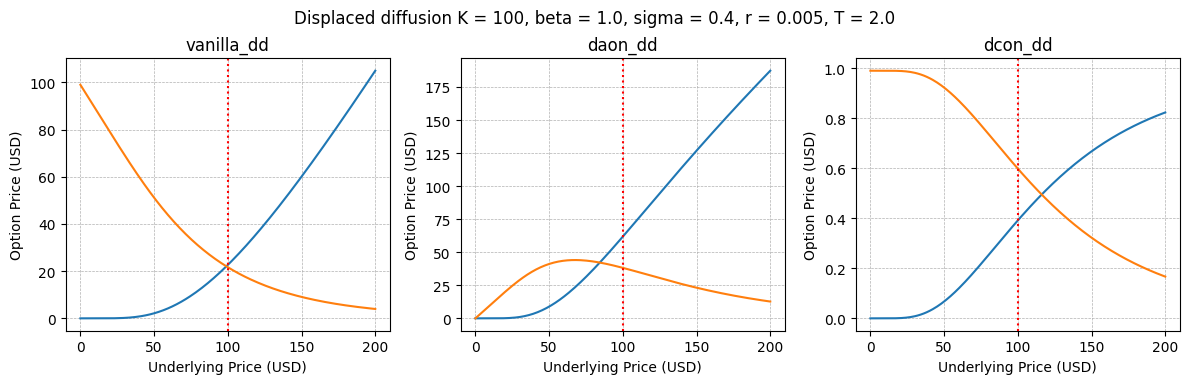

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axs[0].plot(S,vanilla_dd_call[1.0],label = 'call beta 1.0')
axs[0].plot(S,vanilla_dd_put[1.0],label = 'put beta 1.0')
axs[0].axvline(x=K, linestyle = 'dotted', color = 'red')
axs[0].set_title('vanilla_dd')
axs[0].set_xlabel('Underlying Price (USD)')
axs[0].set_ylabel('Option Price (USD)')
axs[0].grid(linestyle = '--', linewidth = 0.5)

axs[1].plot(S,daon_dd_call[1.0],label = 'call beta 1.0')
axs[1].plot(S,daon_dd_put[1.0],label = 'put beta 1.0')
axs[1].axvline(x=K, linestyle = 'dotted', color = 'red')
axs[1].set_title('daon_dd')
axs[1].set_xlabel('Underlying Price (USD)')
axs[1].set_ylabel('Option Price (USD)')
axs[1].grid(linestyle = '--', linewidth = 0.5)

axs[2].plot(S,dcon_dd_call[1.0],label = 'call beta 1.0')
axs[2].plot(S,dcon_dd_put[1.0],label = 'put beta 1.0')
axs[2].axvline(x=K, linestyle = 'dotted', color = 'red')
axs[2].set_xlabel('Underlying Price (USD)')
axs[2].set_ylabel('Option Price (USD)')
axs[2].set_title('dcon_dd')
axs[2].grid(linestyle = '--', linewidth = 0.5)

fig.tight_layout()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f'Displaced diffusion K = {K}, beta = 1.0, sigma = {sigma}, r = {r}, T = {T}')